# Titanic : Machine Learning from Disaster

### Predict survival on the Titanic

* Defining the problem statement
* Collecting the data
* Exploratory data analysis
* Feature engineering
* Feature selection
* Modelling
* Testing

# 1. Defining the problem statement

Complete the analysis of what sorts of people were likely to survive.
<br>In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [4]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")


# 2. Collecting the data
training data set and testing data set are given by Kaggle you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data).
### load train, test dataset using Pandas

In [9]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
* Survived : 0 = No, 1 = Yes
* pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp : # of siblings / spouses aboard the Titanic
* parch : # of parents / children aboard the Titanic
* ticket : Ticket number
* cabin : Cabin number
* embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Total rows and columns
We can see that there are 891 rows and 12 columns in our training dataset.

In [11]:
test.head() # Survived  X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train.shape  # (row, col) return

(891, 12)

In [13]:
test.shape

(418, 11)

In [14]:
train.info()  # (col type, non-null count, dtype) return

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that <b><i>Age</i></b> value is missing for many rows.<br>
Out of 891 rows, the <b><i>Age</i></b> value is present only in 714 rows.<br>
Similarly, <b><i>Cabin</i></b> values are also missing in many rows. Only 204 out of 891 rows have <b><i>Cabin</i></b> values.

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing <b><i>Age</i></b>, 687 rows with missing <b><i>Cabin</i></b> and 2 rows with missing <b><i>Embarked</b></i> information.

### import python lib for visualization

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # setting seaborn default for plots

OSError: Failed to open file b'C:\\Users\\\xec\x9e\x84\xec\xa7\x80\xec\x84\xa0\\AppData\\Local\\Temp\\scipy-zlv9b73q'

### Bar Chart for Categorical Features
* Pclass
* Sex
* SibSp (# of siblings and spouse)
* Parch (# of parents and children)
* Embarked
* Cabin

In [45]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


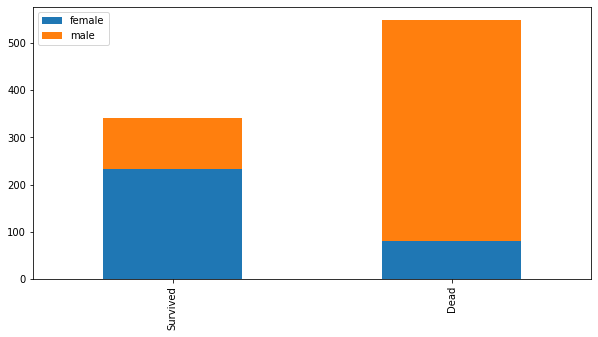

In [46]:
bar_chart('Sex')

The Chart confirms <b>Women</b> more likely survived than <b>Men</b>

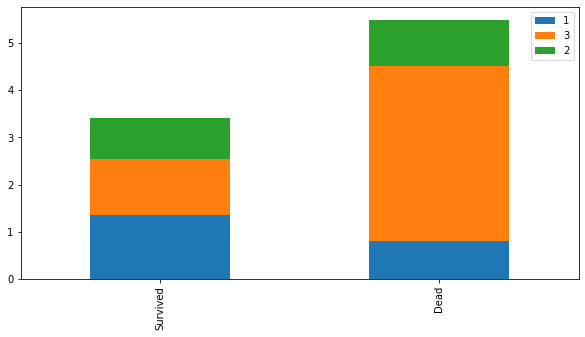

In [35]:
bar_chart('Pclass')

The Chart confirms <b>1st class</b> more likely survived than <b>other classes</b><br>
The Chart confirms <b>3rd class</b> more likely dead than <b>other classes</b>

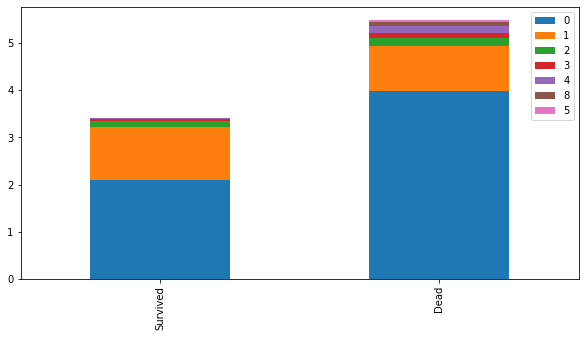

In [36]:
bar_chart('SibSp')

The Chart confirms <b>a person aboarded with more than 2 siblings or spouse</b> more likely survived<br>
The Chart confirms <b>a person aboarded without siblings or spouse</b> more likely dead

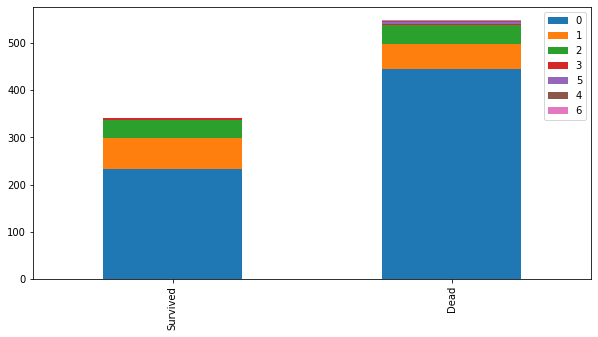

In [32]:
bar_chart('Parch')

The Chart confirms <b>a person aboarded with more than 2 parents or children</b> more likely survived<br>
The Chart confirms <b>a person aboarded alone</b> more likely dead

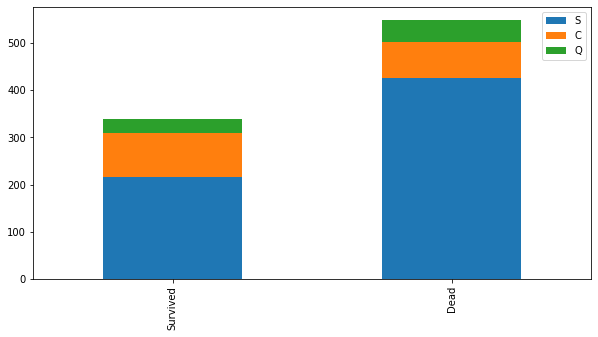

In [47]:
bar_chart('Embarked')

The Chart confirms <b>a person aboarded from C</b> slightly more likely survived<br>
The Chart confirms <b>a person aboarded from Q</b> more likely dead<br>
The Chart confirms <b>a person aboarded from S</b> more likely dead

# Reference
This notebook is created by learning from the following notebooks:
* [Mukesh Chapagain Titanic Solution: A Beginner's Guide](https://www.kaggle.com/code/chapagain/titanic-solution-a-beginner-s-guide/notebook?scriptVersionId=1473689)
* [How to score 0.8134 in Titanic Kaggle Challenge](https://www.ahmedbesbes.com/blog/kaggle-titanic-competition)
* [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)